In [1]:
import urllib.request, json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

link='https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/hk-interbank-ir-daily?segment=hibor.fixing'

with urllib.request.urlopen(link) as url:
    data = json.loads(url.read().decode())

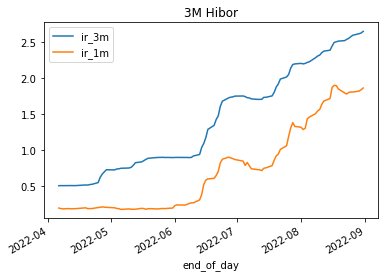

,ir_overnight,ir_1w,ir_1m,ir_3m,ir_6m,ir_9m,ir_12m
end_of_day,,,,,,,
2022-08-31,1.18619,1.42530,1.86542,2.65280,3.29816,None,3.70637
2022-08-30,1.05774,1.43381,1.84060,2.62970,3.25798,None,3.65702
2022-08-29,0.85905,1.40911,1.82208,2.62000,3.19375,None,3.62143
2022-08-26,1.02905,1.40655,1.80911,2.59887,3.14351,None,3.61298
2022-08-25,1.03988,1.40583,1.80982,2.57804,3.12625,None,3.61226
...,...,...,...,...,...,...,...
2022-04-12,0.05512,0.07839,0.18538,0.50845,0.99446,None,1.78815
2022-04-11,0.05583,0.07351,0.18839,0.50810,0.98792,None,1.77155
2022-04-08,0.04863,0.07006,0.18464,0.50738,0.97661,None,1.73131


In [4]:
df=pd.DataFrame.from_dict(data['result']['records'])
df.set_index('end_of_day', inplace=True)
df.index=pd.to_datetime(df.index)
df['ir_3m'].plot()
df['ir_1m'].plot()
plt.title('3M Hibor')
plt.legend()
plt.show()

In [3]:
import urllib.request, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

link='https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/banking/loans-by-sector-lb'

with urllib.request.urlopen(link) as url:
    data = json.loads(url.read().decode())

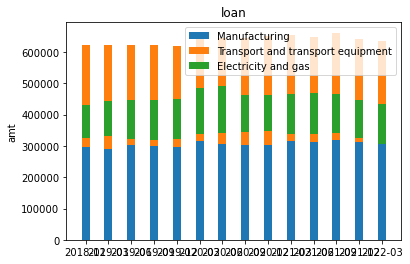

In [4]:
df=pd.DataFrame.from_dict(data['result']['records'])
df.set_index('end_of_month', inplace=True)
df=df.fillna(value=np.nan)
df=df.dropna(axis=1)
df.sort_index(ascending=True, inplace=True)
# df.index=pd.to_datetime(df.index)
# df.fillna('None', inplace=True)
name={'mfg':'Manufacturing', 'af':'Agriculture and fisheries', 
      'tran':'Transport and transport equipment', 'egt':'Electricity, gas and telecommunications',
      'eg':'Electricity and gas', 'rec':'Recreational activities', 
      'it':'Information technology', 'bcpi':'Building and construction, property development and investment', 
      'wsale':'Wholesale and retail trade','mine':'Mining and quarrying',
      'misc':'Miscellaneous', 'loan_inhk':'Loans and advances for use in Hong Kong'}
name_new={key:name[key] for key in df.columns if key in list(name.keys())}
df_new=df[[i for i in name_new.keys()]]
df_new.columns=[name_new[i] for i in df_new.columns]

# sum_index=[df_new.loc[i].sum() for i in df_new.index]
# print(sum_index)
# l_hk=[df_new.loc[i,'Loans and advances for use in Hong Kong'] for i in df_new.index]
# print(l_hk)
# print([i / j for i, j in zip(sum_index, l_hk)])


fig, ax = plt.subplots()
width = 0.35
# for i in range(len(df_new.columns)):
#     if i==0:
#         ax.bar(df_new.index, df_new.iloc[:,i], width, label=df_new.columns[i])
#     else:
#         ax.bar(df_new.index, df_new.iloc[:,i], width, label=df_new.columns[i], bottom=df_new.columns[i-1])
#     not finished
# ax.bar(df_new.index, df_new['Manufacturing'], width, label='Manufacturing')
# ax.bar(df_new.index, df_new['Transport and transport equipment'], width, bottom=df_new['Manufacturing'], label='Transport and transport equipment')
ax.bar(df_new.index, df_new.iloc[:,0], width, label=df_new.columns[0])
ax.bar(df_new.index, df_new.iloc[:,1], width, label=df_new.columns[1], bottom=df_new.iloc[:,1-1])
ax.bar(df_new.index, df_new.iloc[:,2], width, label=df_new.columns[2], bottom=df_new.iloc[:,2-1])
ax.set_ylabel('amt')
ax.set_title('loan')
ax.legend()

plt.show()

In [83]:
df_new

,Manufacturing,Transport and transport equipment,Electricity and gas,Recreational activities,Information technology,"Building and construction, property development and investment",Wholesale and retail trade,Miscellaneous,Loans and advances for use in Hong Kong
end_of_month,,,,,,,,,
2018-12,296123.942,326939.661,102988.352,12507.182,116782.501,1522160.407,389306.642,3511733.297,6278541.984
2019-03,291730.024,330516.219,112756.970,13531.527,125222.653,1545436.026,370097.095,3609539.032,6398829.546
2019-06,301565.753,322558.368,123295.220,12405.211,118342.200,1569941.898,382657.082,3711371.990,6542137.722
2019-09,300863.915,320402.377,125262.908,14578.608,145640.848,1579386.078,385281.895,3818696.383,6690113.012
2019-12,297612.410,322750.790,127555.752,16293.832,118920.325,1615028.000,375468.707,3879631.801,6753261.617
2020-03,317139.420,338134.110,148176.469,16727.266,130752.418,1656044.290,371431.220,3992412.693,6970817.886
2020-06,305939.359,340629.430,151184.298,12331.746,137889.688,1611978.029,370253.446,3993264.756,6923470.752
2020-09,302278.509,344070.460,117662.025,14264.674,144619.136,1592214.349,356917.233,4417766.678,7289793.064
2020-12,303962.386,346258.544,117651.389,13535.946,136735.478,1615159.385,347154.578,4021320.934,6901778.640


In [70]:
print(name)
print(name['mfg'])
print([i for i in df.columns])
print(list(name.keys()))

name_new={key:name[key] for key in df.columns if key in list(name.keys())}
print(name_new)

{'mfg': 'Manufacturing', 'af': 'Agriculture and fisheries', 'tran': 'Transport and transport equipment', 'egt': 'Electricity, gas and telecommunications', 'eg': 'Electricity and gas', 'rec': 'Recreational activities', 'it': 'Information technology', 'bcpi': 'Building and construction, property development and investment', 'wsale': 'Wholesale and retail trade', 'mine': 'Mining and quarrying', 'misc': 'Miscellaneous', 'loan_inhk': 'Loans and advances for use in Hong Kong'}
Manufacturing
['mfg', 'mfg_textiles', 'mfg_footwear', 'mfg_metalengr', 'mfg_rubbplastchem', 'mfg_ee', 'mfg_ee_teleequip', 'mfg_ee_other', 'mfg_food', 'mfg_bevtob', 'mfg_printpub', 'mfg_misc', 'tran', 'tran_shipping', 'tran_airtran', 'tran_taxisplb', 'tran_taxisplb_taxis', 'tran_taxisplb_plb', 'tran_other', 'eg', 'rec', 'it', 'it_telecom', 'it_other', 'bcpi', 'bcpi_propdev', 'bcpi_propdev_ind', 'bcpi_propdev_res', 'bcpi_propdev_comm', 'bcpi_propdev_other', 'bcpi_other', 'wsale', 'misc', 'misc_hotelcater', 'misc_fin', 'm